# 莫烦Python tensorflow

In [15]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [13]:
tf.set_random_seed(1)
np.random.seed(1)

BATCH_SIZE = 50
LR = 0.001              # learning rate

mnist = input_data.read_data_sets('./data', one_hot=True)  # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(55000, 10)


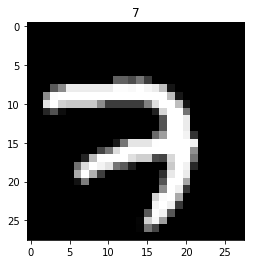

In [16]:
# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0])); plt.show()

In [17]:
tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
image = tf.reshape(tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])            # input y

In [18]:
# CNN
conv1 = tf.layers.conv2d(   # shape (28, 28, 1)
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)           # -> (28, 28, 16)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2,
)           # -> (14, 14, 16)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # -> (14, 14, 32)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # -> (7, 7, 32)
flat = tf.reshape(pool2, [-1, 7*7*32])          # -> (7*7*32, )
output = tf.layers.dense(flat, 10)              # output layer

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

In [28]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

In [29]:
for step in range(700):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_, flat_representation = sess.run([accuracy, flat], {tf_x: test_x, tf_y: test_y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

Step: 0 | train loss: 2.3098 | test accuracy: 0.16
Step: 50 | train loss: 0.5405 | test accuracy: 0.50
Step: 100 | train loss: 0.2282 | test accuracy: 0.63
Step: 150 | train loss: 0.2974 | test accuracy: 0.70
Step: 200 | train loss: 0.3693 | test accuracy: 0.75
Step: 250 | train loss: 0.0883 | test accuracy: 0.78
Step: 300 | train loss: 0.0355 | test accuracy: 0.80
Step: 350 | train loss: 0.0793 | test accuracy: 0.82
Step: 400 | train loss: 0.0845 | test accuracy: 0.84
Step: 450 | train loss: 0.0552 | test accuracy: 0.85
Step: 500 | train loss: 0.1051 | test accuracy: 0.86
Step: 550 | train loss: 0.0886 | test accuracy: 0.87
Step: 600 | train loss: 0.1830 | test accuracy: 0.87
Step: 650 | train loss: 0.1230 | test accuracy: 0.88


# 莫烦Python Keras

In [6]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # 加载mnist数据，路径C:\Users\zydar\.keras

11493376/11490434 [==============================] - 38s 3us/step


In [3]:
# data pre-processing
X_train = X_train.reshape(-1, 1,28, 28)/255.
X_test = X_test.reshape(-1, 1,28, 28)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=1, batch_size=64,)

print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)

Training ------------
Epoch 1/1
60000/60000 [==============================] - 15s 250us/step - loss: 0.2704 - acc: 0.9261

Testing ------------
10000/10000 [==============================] - 1s 90us/step

test loss:  0.10005062450654804

test accuracy:  0.9687


# [Udacity](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/4_convolutions.ipynb)

In [8]:
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

# [百度狗细粒度分类比赛](https://github.com/ahangchen/keras-dogs/blob/master/README_cn.md)

# [TensorFlow-Examples](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py)